In [ ]:
# logistic regression



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

In [40]:
Default = pd.read_csv('student_data.csv')
Default.head()

,StudentID,Student,Income,Balance,IsStudent
0,101,Alice,30000,1200.50,True
1,102,Bob,45000,850.75,True
2,103,Charlie,28000,1500.00,True
3,104,David,55000,600.20,True
4,105,Eve,32000,1150.00,No


In [41]:
Default.shape  # count no. of rows and columns

(10, 5)

In [42]:
Default.describe()  # statistical summary of the dataset

,StudentID,Income,Balance
count,10.00000,10.000000,10.000000
mean,105.50000,40500.000000,995.285000
std,3.02765,12195.172087,366.815818
min,101.00000,25000.000000,550.900000
25%,103.25000,30500.000000,712.875000
50%,105.50000,39000.000000,950.375000
75%,107.75000,50250.000000,1187.875000
max,110.00000,58000.000000,1600.000000


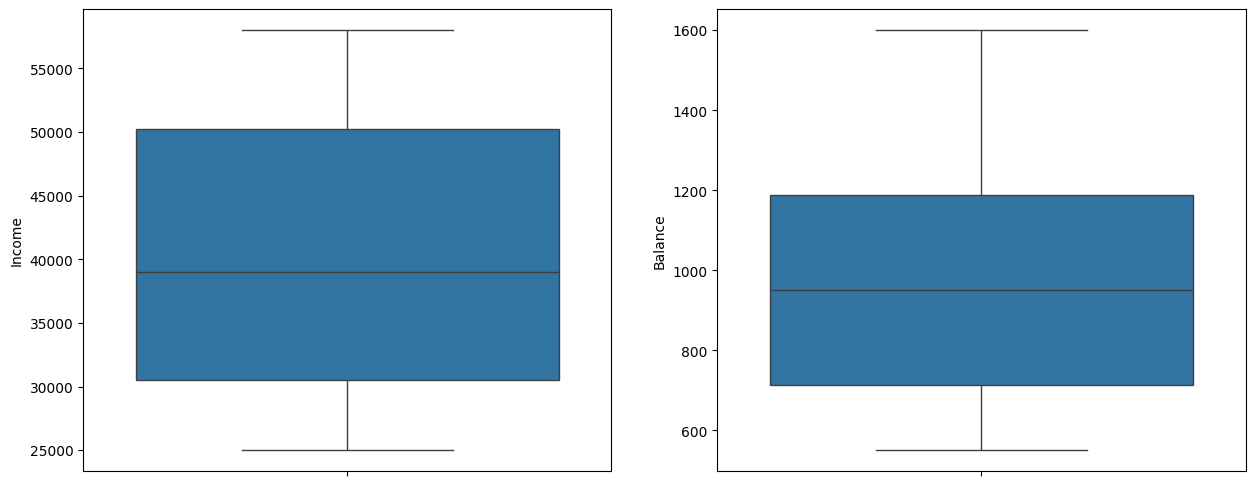

In [49]:
# boxplot give us the summary of the data distribution 

plt.figure(figsize=(15,6)) # figure size 8x6     
plt.subplot(1,2,1) # 1 row 2 columns, first plot
sns.boxplot(y=Default['Income'])

plt.subplot(1,2,2) # 1 row 2 columns, second plot
sns.boxplot(y=Default['Balance'])
plt.show()

# in this fig we can see that there are some outliers in the income and balance column
# the difference between 75% and 25%tile is called interquartile range(IQR)
# we can see minimum and maximum values in the boxplot

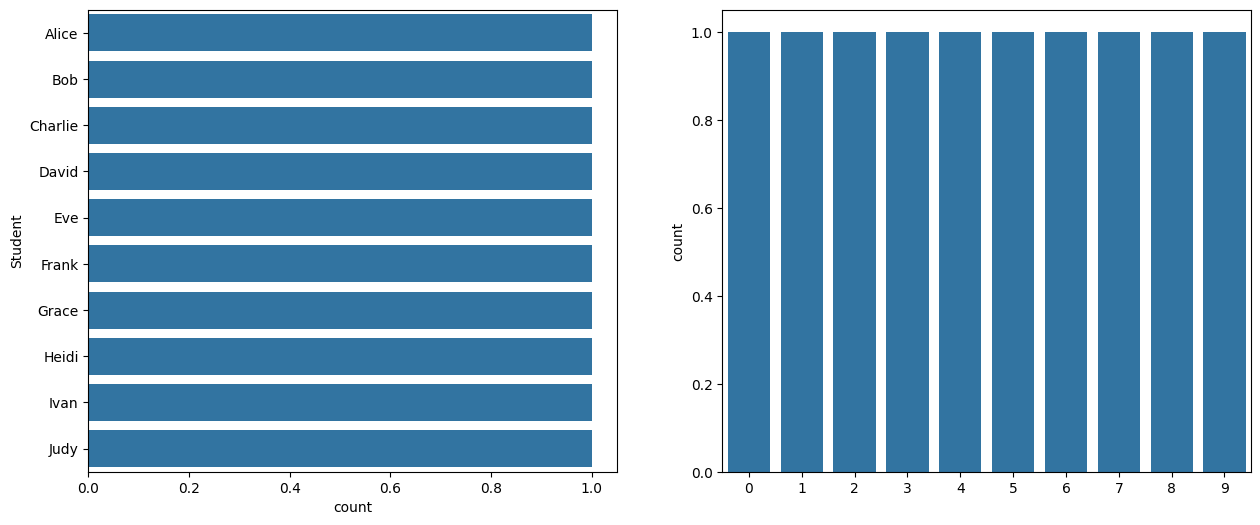

In [48]:
#countplot is used to show the counts of observations in each categorical bin using bars.
# kitne student hai aur kitne non student hai 

plt.figure(figsize=(15,6)) # figure size 8x6     
plt.subplot(1,2,1) # 1 row 2 columns, first plot
sns.countplot(Default['Student'])

plt.subplot(1,2,2) # 1 row 2 columns, second plot
sns.countplot(Default['StudentID'])
plt.show()

In [50]:
Default['Student'].value_counts()  # count how many students and non students are there

Student
Alice      1
Bob        1
Charlie    1
David      1
Eve        1
Frank      1
Grace      1
Heidi      1
Ivan       1
Judy       1
Name: count, dtype: int64

In [51]:
Default['IsStudent'].value_counts()  # count how many students and non students are there

IsStudent
True    8
No      2
Name: count, dtype: int64

In [52]:
Default['Student'].value_counts(normalize=True)  # percentage of students and non students

Student
Alice      0.1
Bob        0.1
Charlie    0.1
David      0.1
Eve        0.1
Frank      0.1
Grace      0.1
Heidi      0.1
Ivan       0.1
Judy       0.1
Name: proportion, dtype: float64

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

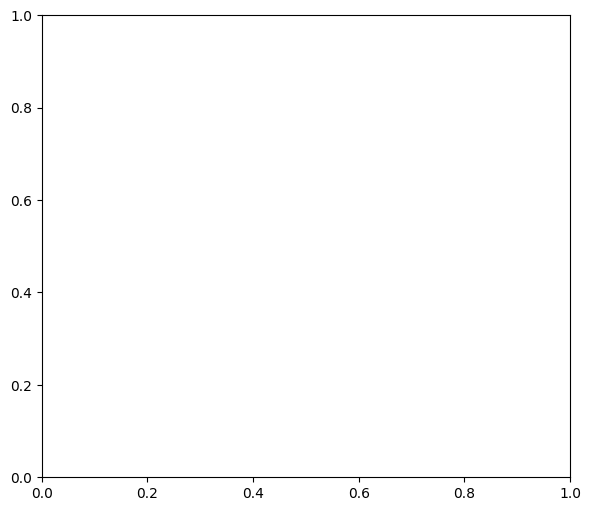

In [53]:
# bivariate analysis

plt.figure(figsize=(15,6)) # figure size 8x6     
plt.subplot(1,2,1) # 1 row 2 columns, first plot
sns.boxplot( Default['IsStudent'] , Default['Income'] )

plt.subplot(1,2,2) # 1 row 2 columns, second plot
sns.boxplot( Default['IsStudent'] , Default['Balance'])
plt.show()

In [54]:
pd.crosstab(Default['IsStudent'], Default['StudentID'], normalize=True).round(2) # cross tabulation is a table that displays the frequency distribution of variables.

StudentID,101,102,103,104,105,106,107,108,109,110
IsStudent,,,,,,,,,,
No,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1
True,0.1,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.0


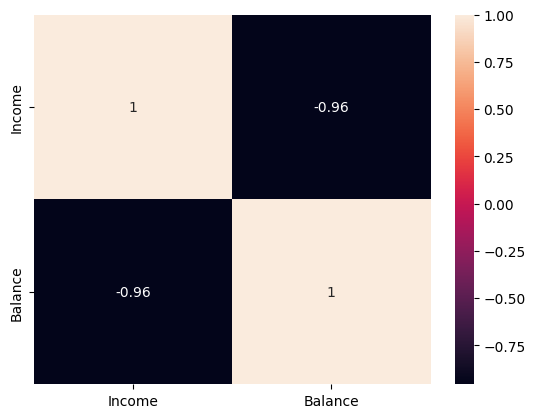

In [ ]:
# heatmap is used to visualize the correlation matrix
sns.heatmap(Default[['Income','Balance']].corr(), annot=True)
plt.show()
# not more diffence between income and balance

In [56]:
Default.isnull().sum()  # check for missing values

StudentID    0
Student      0
Income       0
Balance      0
IsStudent    0
dtype: int64

In [57]:
# whenever we build a model we have to remove the outliers
# we will remove the outliers using IQR method (by taking max and min values)
# IQR = Q3 - Q1 (75% - 25%tile)
# max = Q3 + 1.5*IQR

In [58]:
Q1 , Q3 = Default['Income'].quantile([0.25,0.75])
IQR = Q3 - Q1
max = Q3 + 1.5*IQR # max or UL(upper limit)
min = Q1 - 1.5*IQR # min or LL(lower limit)

In [59]:
max

79875.0

In [66]:
df= Default[Default['Balance']<max] # removing the outliers



In [67]:
df

,StudentID,Student,Income,Balance,IsStudent
0,101,Alice,30000,1200.50,True
1,102,Bob,45000,850.75,True
2,103,Charlie,28000,1500.00,True
3,104,David,55000,600.20,True
4,105,Eve,32000,1150.00,No
5,106,Frank,48000,700.50,True
6,107,Grace,25000,1600.00,True
7,108,Heidi,58000,550.90,True
8,109,Ivan,33000,1050.00,True
9,110,Judy,51000,750.00,No


In [68]:
Default['Balance'] =np.where(Default['Balance']>max, max, Default['Balance']) # replacing the outliers with max value

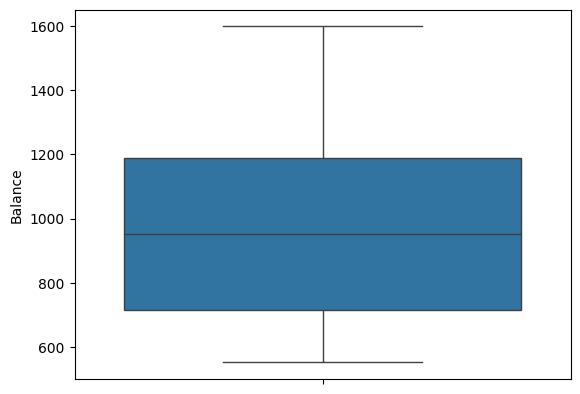

In [69]:
sns.boxplot(y=Default['Balance'])
plt.show()

In [70]:
Default = pd.get_dummies(Default, drop_first=True)
# converting categorical variable into dummy/indicator variables
#it is very useful for machine learning algorithms which can only take numerical input.

In [71]:
Default.head()

,StudentID,Income,Balance,Student_Bob,Student_Charlie,Student_David,Student_Eve,Student_Frank,Student_Grace,Student_Heidi,Student_Ivan,Student_Judy,IsStudent_True
0,101,30000,1200.50,False,False,False,False,False,False,False,False,False,True
1,102,45000,850.75,True,False,False,False,False,False,False,False,False,True
2,103,28000,1500.00,False,True,False,False,False,False,False,False,False,True
3,104,55000,600.20,False,False,True,False,False,False,False,False,False,True
4,105,32000,1150.00,False,False,False,True,False,False,False,False,False,False


In [76]:
#Default.columns = ['StudentID', 'Balance', 'Income', 'Student_Yes', 'IsStudent']

In [77]:
# we apply logistic regression because our target variable is binary (0 and 1)
from sklearn.model_selection import train_test_split

In [80]:
# x = Default.drop('Student', axis=1) # dependent variables
# y = Default['Student'] # target variable

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42 , startify=y) 
# # 70% training and 30% test
#use stratify=y to ensure that the proportion of classes is maintained in both the training and testing sets.

NameError: name 'x' is not defined

In [83]:
# print(x_train.shape)
# print(x_test.shape)

In [84]:
# print(y_train.value_counts(normalize=True).round(2)) # percentage of students and non students in training set
# print(y_test.value_counts(normalize=True).round(2)) # percentage of students and non

In [ ]:
# SMOTE (Synthetic Minority Over-sampling Technique) 
# iif categoriws is imbalanced we use this technique to balance the data
#if we not use  sampling_strategy by default it take 0.5
# 0.75= 3:4 ratio means 3 non students and 4 students
# sm.fit_resample() is used to resample or over_sample so that the model can't be more imbalanced

# from imblearn.over_sampling import SMOTE    
# sm  = SMOTE(random_state=42 , sampling_strategy=0.75)
# X_res, y_res = sm.fit_resample(x_train, y_train) # resampled data

In [86]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# lr = LogisticRegression()
# lr.fit(x_res, y_res) # lr sample ko fit kr rahe hai training data pe 

In [ ]:
# y_pred = lr.predict(x_test) # predict kr rahe hai test data pe

In [ ]:
# confusion_matrix() => pass actual and predicted values

# from sklearn.linear_model import confusion_matrix, classification_report

In [92]:
# confusion_matrix(y_test, y_pred) # left diagonal is correct prediction and right diagonal is incorrect prediction

In [ ]:
# (2589+75)/(2589+7) : to predict value.... accuracy check...